In [43]:
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [44]:
#Getting Data into DataFrame

df_canada = pd.read_excel('share/A10_DataPreperationAndVisualization-master/DataVisualization/data/canada.xlsx',
                          sheet_name = 'Canada by Citizenship',
                          skiprows = range(20),
                          skipfooter = 2)
df_canada_temp=df_canada

In [45]:
# Pre-processing data for calculating relative contribution and plotting

df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_canada.columns = list(map(str, df_canada.columns))
years = list(map(str, range(1980, 2014)))
# add Total column
df_canada['Total'] = df_canada.sum(axis=1)
df_canada_temp = pd.DataFrame(df_canada[years].sum(axis=0))
df_canada_temp.reset_index(inplace = True)
# rename columns
df_canada_temp.columns = ['year', 'total']
# index data by country
df_canada.set_index('Country', inplace=True)
df_canada_temp

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


1. Get top 5 countries having maximum immigration from Continent Asia in period: 1980-2013

In [46]:
# Sorting Countries in Asia Based on Total Value Descending
df_asiaimm_continent=df_canada[df_canada['Continent']=='Asia']
df_asiaimm_top5=df_asiaimm_continent.sort_values(by='Total', ascending=False).head()
print(','.join(map(str,df_asiaimm_top5.index.values)))
#print(len(df_asiaimm_continent.columns))

India,China,Philippines,Pakistan,Iran


In [47]:
# Unstacking the pivot table to get the year values in dataframe for plotting
df_asiaimm_top5.reset_index(drop=True)
df_asiaimm_top5.iloc[:,4:]=df_asiaimm_top5.iloc[:,4:].apply(pd.to_numeric)
df_asiaimm_top5.drop(['Continent','Region','DevName','Total'], axis=1, inplace=True)
df_asiaimm_top5.unstack()
df_asiaimm_top5 = df_asiaimm_top5.unstack().reset_index(name='Number Of Immigrants')
df_asiaimm_top5.rename(columns={'level_0': 'year'}, inplace=True)
df_asiaimm_top5

,year,Country,Number Of Immigrants
0,1980,India,8880
1,1980,China,5123
2,1980,Philippines,6051
3,1980,Pakistan,978
4,1980,Iran,1172
5,1981,India,8670
6,1981,China,6682
7,1981,Philippines,5921
8,1981,Pakistan,972
9,1981,Iran,1429


2. Plot the immigration trend from the above 5 countries over the years from 1980 through 2013

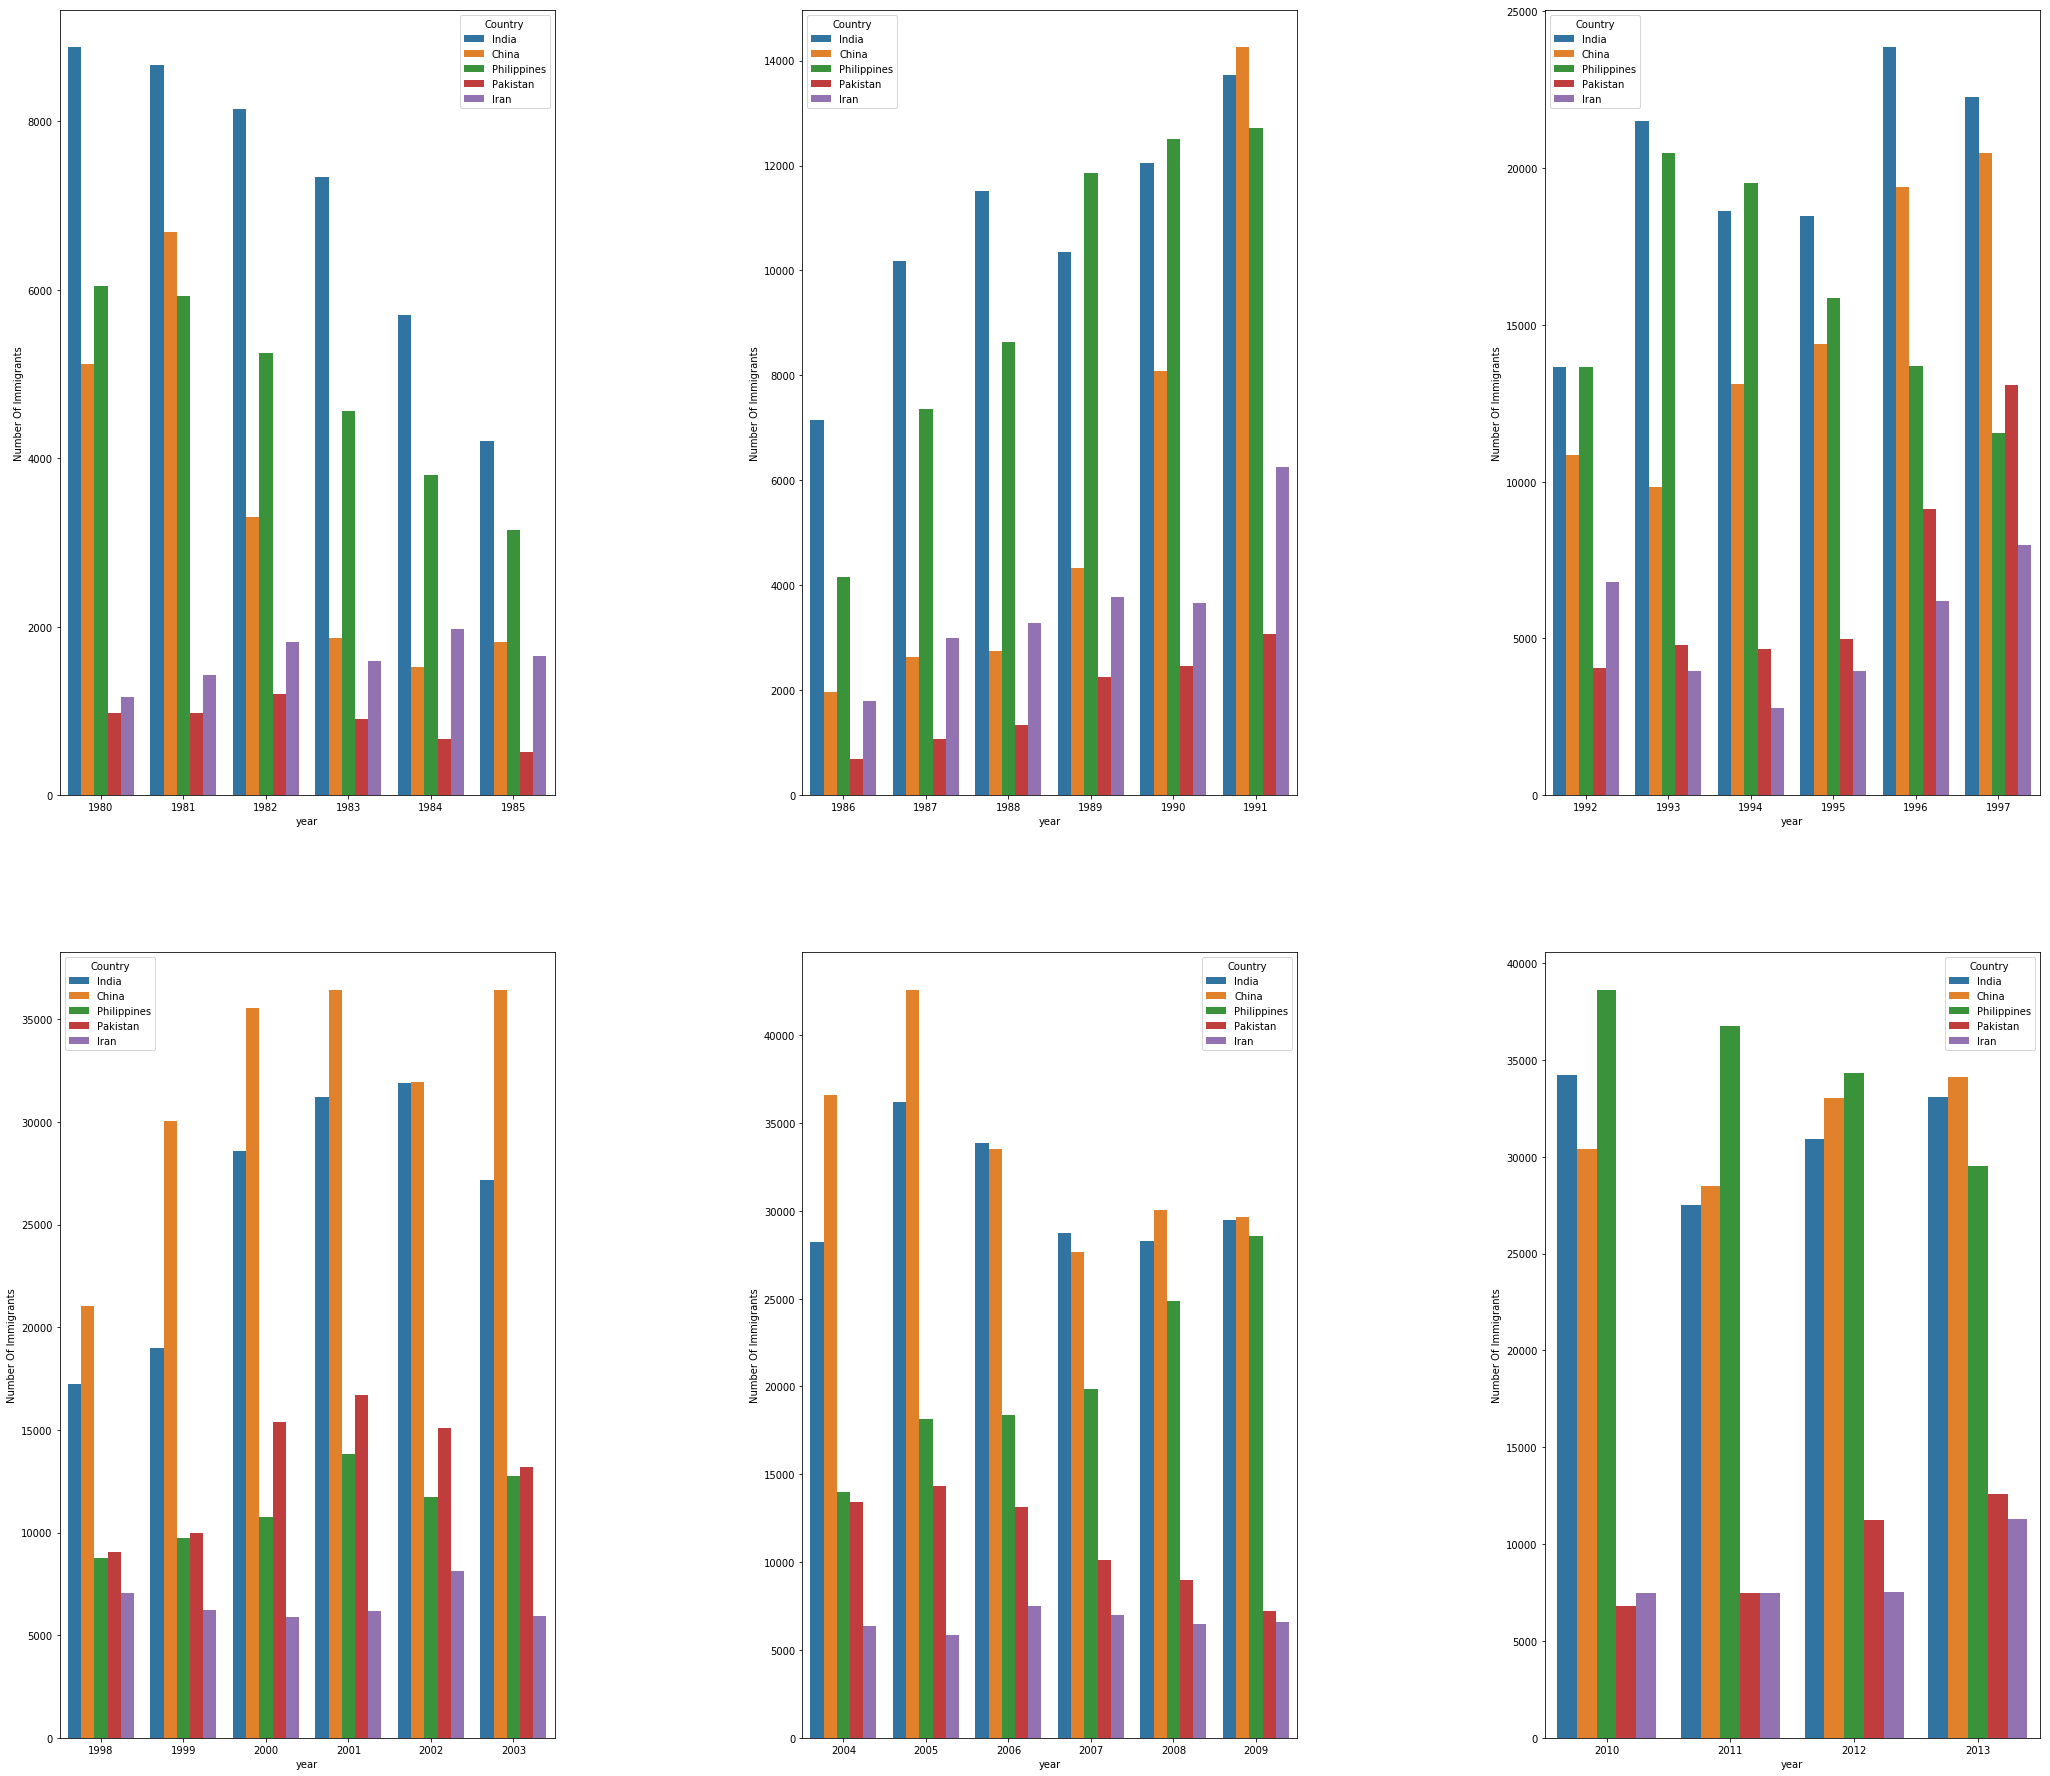

In [48]:
# Dividing data into subplots with year period having 6 years each and last period having 4 years.

fig, ax = plt.subplots(figsize=(20,30), ncols=3, nrows=2)

left   =  0.125  # the left side of the subplots of the figure
right  =  1.5    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  .2    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# The amount of space above titles
y_title_margin = 1.2
sns.barplot(x='year',y='Number Of Immigrants',hue='Country',data=df_asiaimm_top5.iloc[0:30,:],ax=ax[0][0])
sns.barplot(x='year',y='Number Of Immigrants',hue='Country',data=df_asiaimm_top5.iloc[30:60,:],ax=ax[0][1])
sns.barplot(x='year',y='Number Of Immigrants',hue='Country',data=df_asiaimm_top5.iloc[60:90,:],ax=ax[0][2])
sns.barplot(x='year',y='Number Of Immigrants',hue='Country',data=df_asiaimm_top5.iloc[90:120,:],ax=ax[1][0])
sns.barplot(x='year',y='Number Of Immigrants',hue='Country',data=df_asiaimm_top5.iloc[120:150,:],ax=ax[1][1])
sns.barplot(x='year',y='Number Of Immigrants',hue='Country',data=df_asiaimm_top5.iloc[150:170,:],ax=ax[1][2])

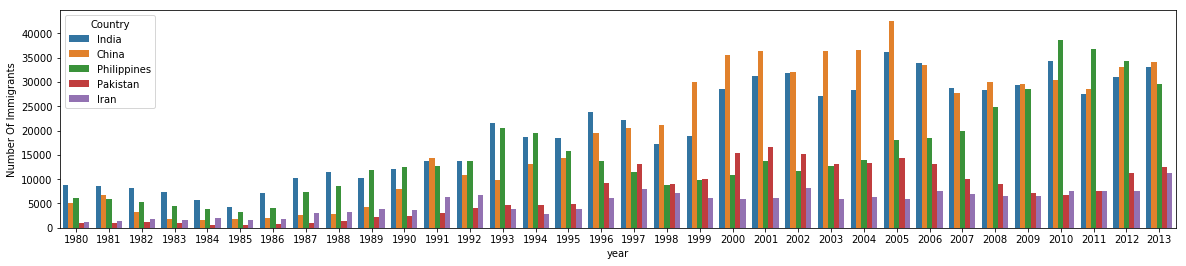

In [49]:
# Without dividing into subplots
plt.figure(figsize=(20, 4))
sns.barplot(x='year',y='Number Of Immigrants',hue='Country',data=df_asiaimm_top5)

3. Relative contribution of top 5 countries with the total immigration in all countries during the period

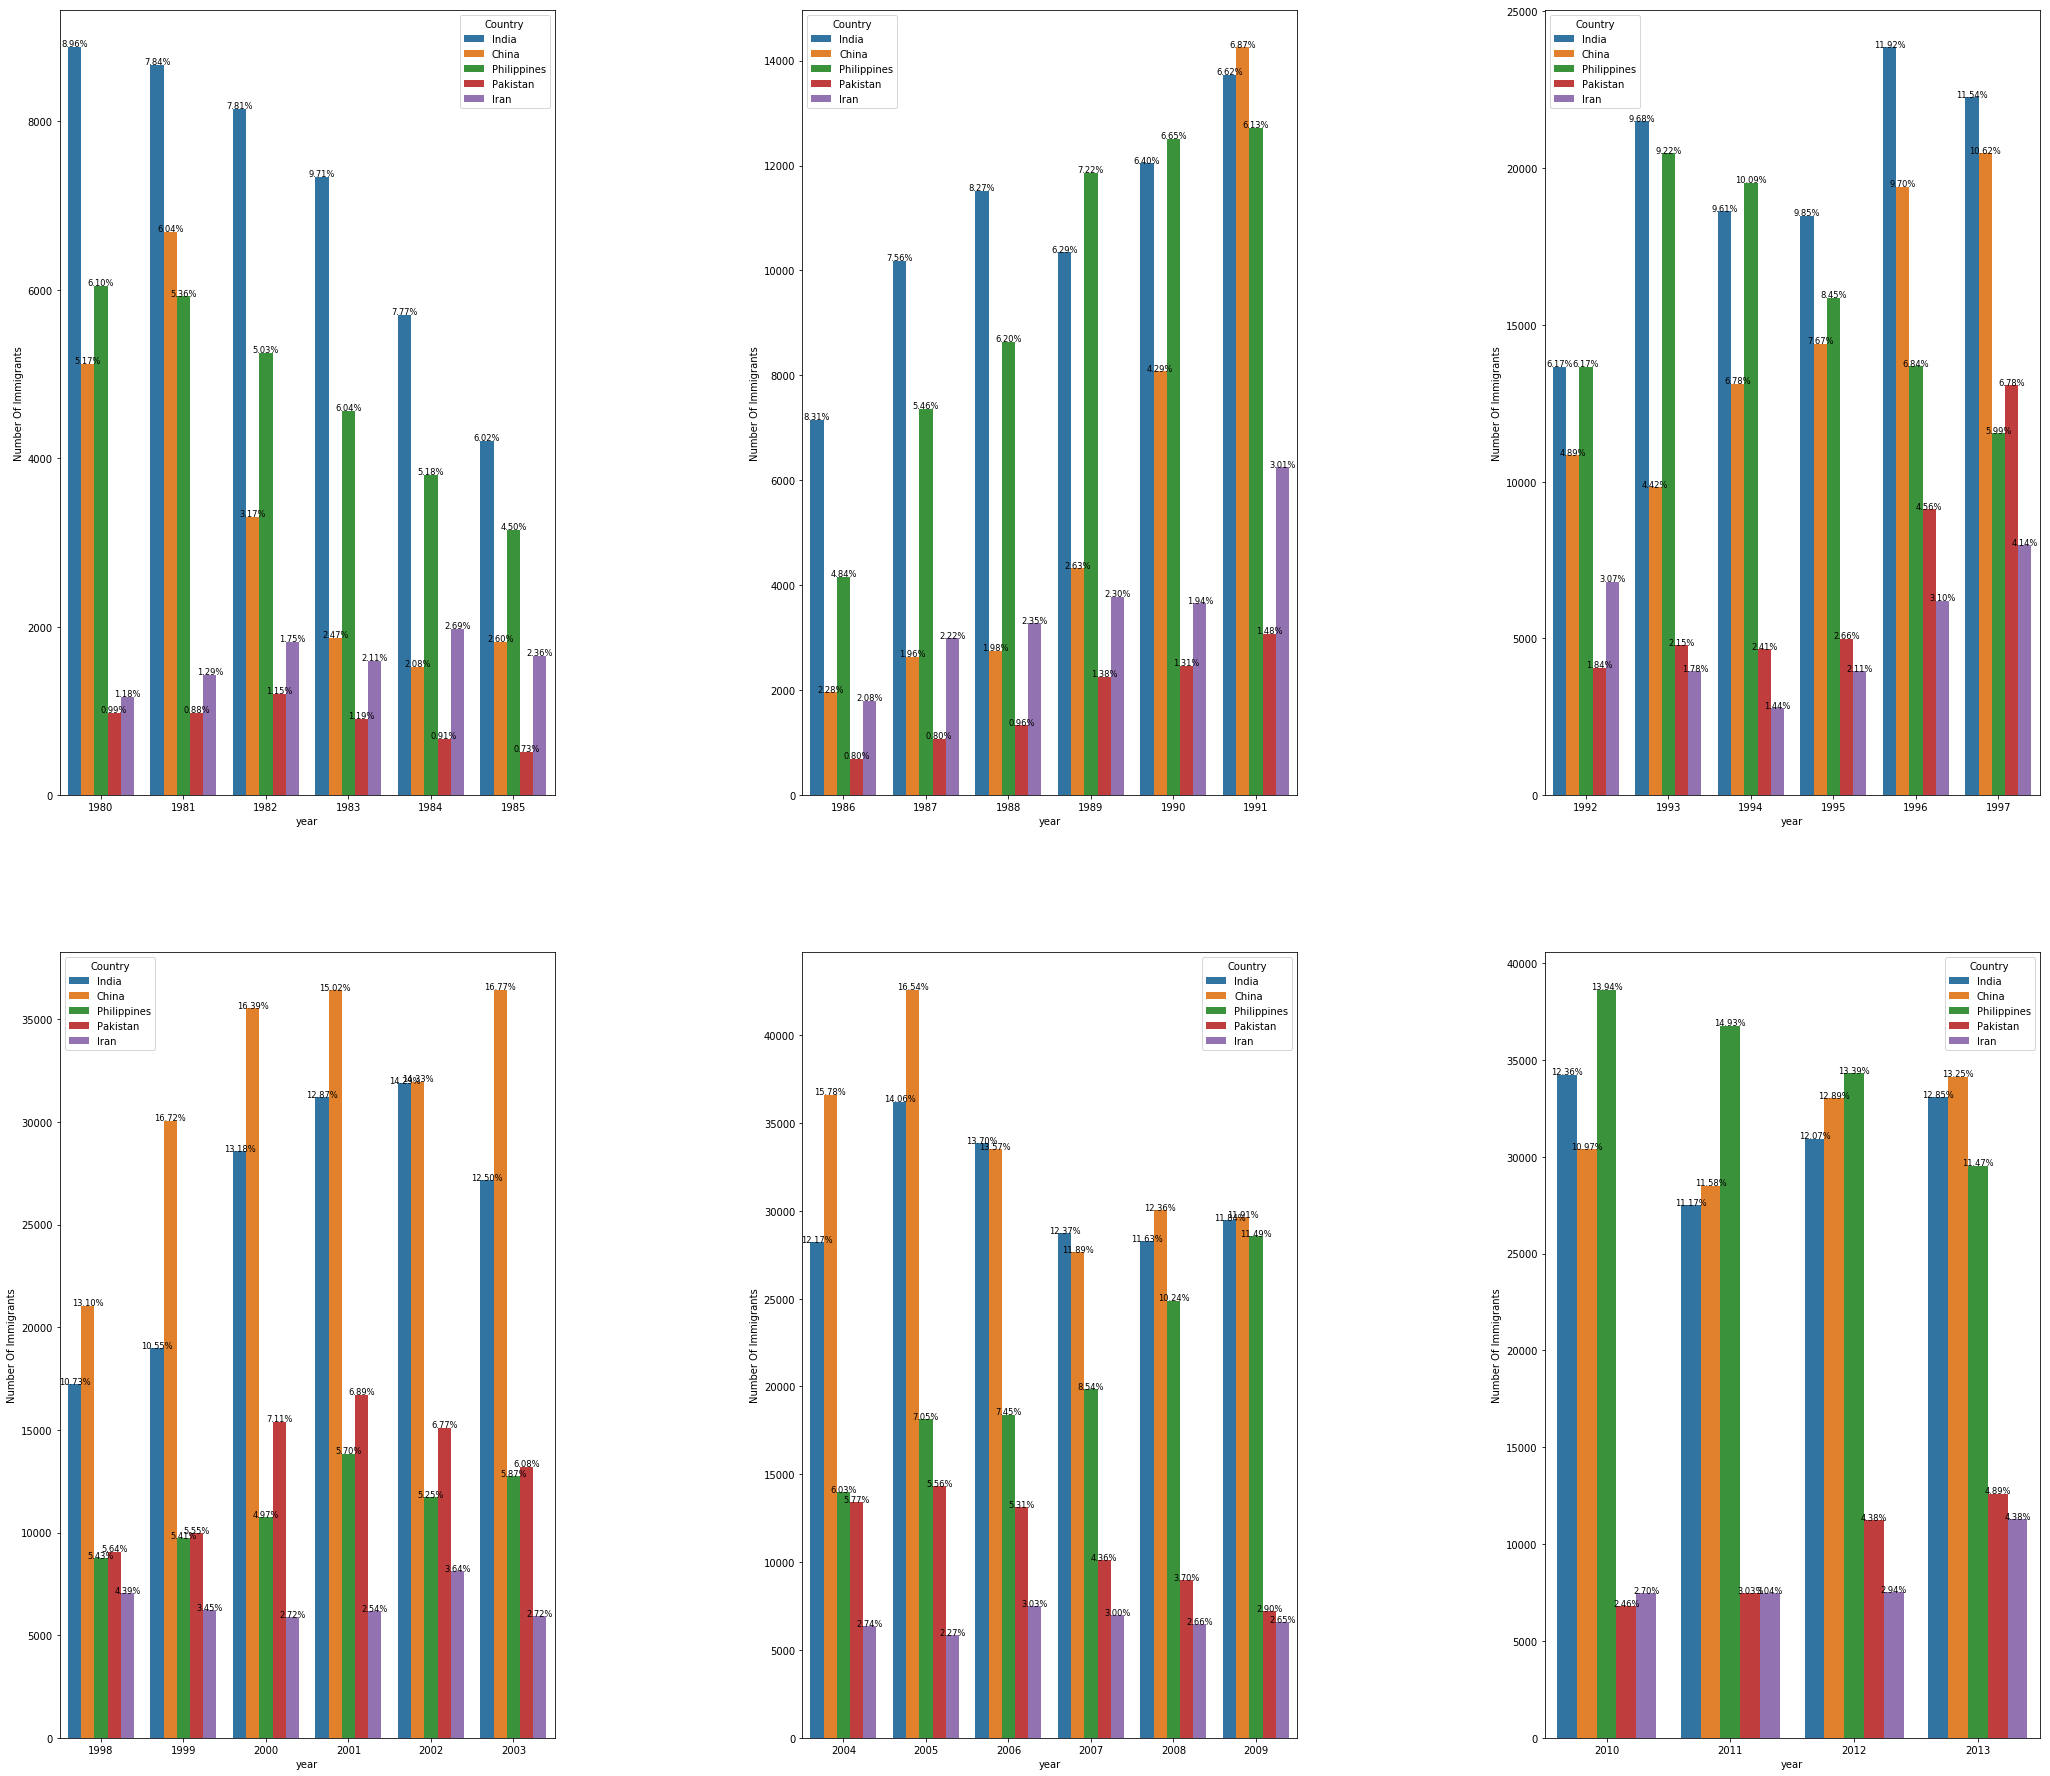

In [50]:
# Relative Contribution of Countries in immigration as percentage in subplot for 6 year period and last having 4 year period.
# The Relative Contribution percent value is on top of each of the top 5 country bars for that year in the year period
# Total of immigration count is taken for all countries for relative contribution in percentage.
# Calculate axis text method is used to calculate the relative contribution value on each bar

fig, ax = plt.subplots(figsize=(20,30), ncols=3, nrows=2)
count=0
m=0
start=0
b=[]
b.append(m)
def calculate_axis_text(ax,n,a):
    count=0
    start=0
    m=b[-1]
    for p in ax.patches:
        height = p.get_height()
        if(count%a==0 and start!=0):
            m=n
            count=0
        start=1
        #print(height)
        #print(df_canada_temp.iloc[m,1])
        ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            '{:1.2f}%'.format((height/df_canada_temp.iloc[m,1])*100.0),size='smaller',
            ha="center")
        m=m+1
        #print(count)
        count=count+1
    b.append(m)
    return m
        
left   =  0.125  # the left side of the subplots of the figure
right  =  1.5    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =  .2    # the amount of height reserved for white space between subplots

# This function actually adjusts the sub plots using the above paramters
plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

# The amount of space above titles
y_title_margin = 1.2
ax1=sns.barplot(x='year',y='Number Of Immigrants',hue='Country',data=df_asiaimm_top5.iloc[0:30,:],ax=ax[0][0])
n=calculate_axis_text(ax1,0,6)
ax2=sns.barplot(x='year',y='Number Of Immigrants',hue='Country',data=df_asiaimm_top5.iloc[30:60,:],ax=ax[0][1])
n=calculate_axis_text(ax2,n,6)
ax3=sns.barplot(x='year',y='Number Of Immigrants',hue='Country',data=df_asiaimm_top5.iloc[60:90,:],ax=ax[0][2])
n=calculate_axis_text(ax3,n,6)
ax4=sns.barplot(x='year',y='Number Of Immigrants',hue='Country',data=df_asiaimm_top5.iloc[90:120,:],ax=ax[1][0])
n=calculate_axis_text(ax4,n,6)
ax5=sns.barplot(x='year',y='Number Of Immigrants',hue='Country',data=df_asiaimm_top5.iloc[120:150,:],ax=ax[1][1])
n=calculate_axis_text(ax5,n,6)
ax6=sns.barplot(x='year',y='Number Of Immigrants',hue='Country',data=df_asiaimm_top5.iloc[150:170,:],ax=ax[1][2])
n=calculate_axis_text(ax6,n,4)